In [1]:
import dynamo as dyn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import preprocessor_benchmark_utils
dyn.dynamo_logger.main_silence()

In [2]:
# {dataset: {recipe: time}}
dataset_recipe_time = {}

In [3]:
zebrafish_adata = dyn.sample_data.zebrafish()
pancreas_adata = dyn.sample_data.pancreatic_endocrinogenesis()
dentate_gyrus_adata = dyn.sample_data.DentateGyrus_scvelo()
rpe1_adata = dyn.sample_data.scEU_seq_rpe1()
organoid_adata = dyn.sample_data.scEU_seq_organoid()
hgForebrainGlutamatergic_adata = dyn.sample_data.hgForebrainGlutamatergic()
chromaffin_adata = dyn.sample_data.chromaffin()
bm_adata = dyn.sample_data.BM()


|-----> [preprocess] in progress: 100.0000%
|-----> [preprocess] finished [3.8150s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0020s]


<Figure size 1000x1000 with 0 Axes>

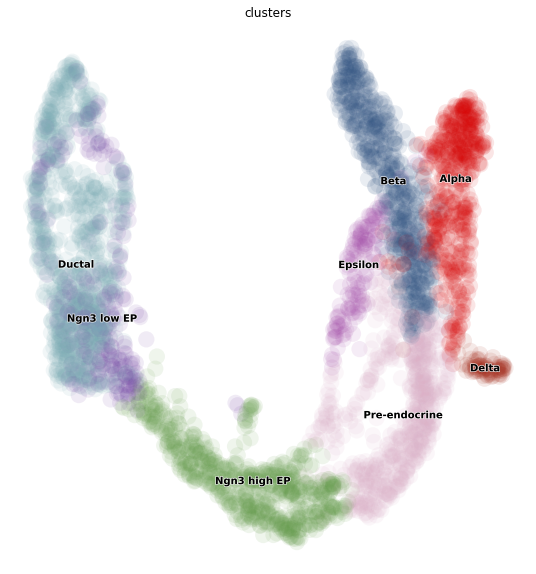

|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [17.3671s]
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.1660s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.9140s]


<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

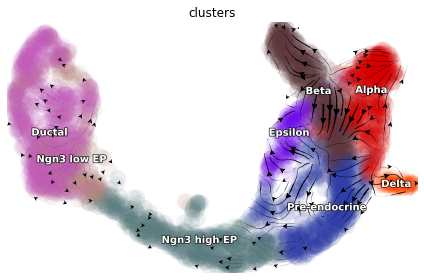

|-----> [preprocess by seurat recipe] in progress: 100.0000%
|-----> [preprocess by seurat recipe] finished [2.6550s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]


<Figure size 1000x1000 with 0 Axes>

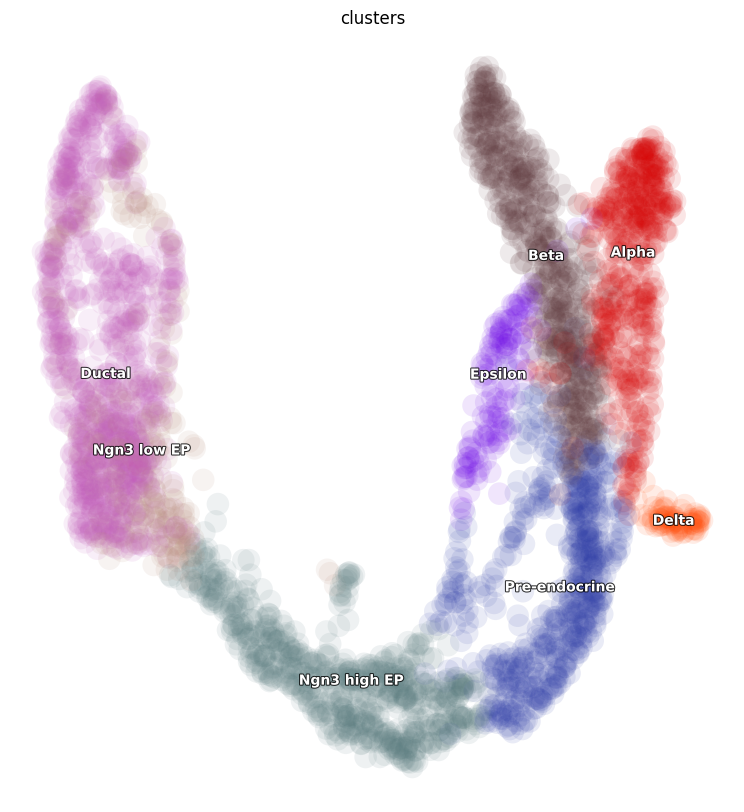

|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [12.6410s]
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [4.5750s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8120s]


<Figure size 640x480 with 0 Axes>

<Figure size 600x400 with 0 Axes>

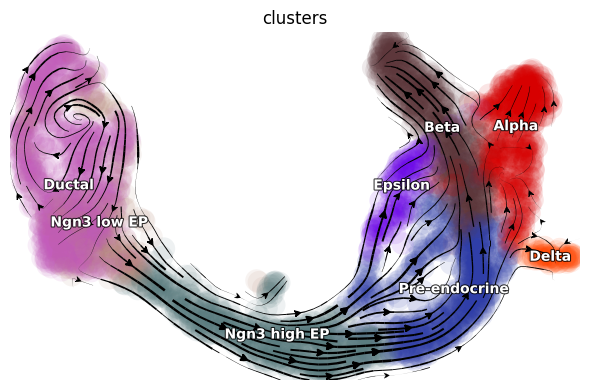

|-----> [preprocess by pearson residual recipe] in progress: 100.0000%
|-----> [preprocess by pearson residual recipe] finished [32.7005s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0010s]


<Figure size 1000x1000 with 0 Axes>

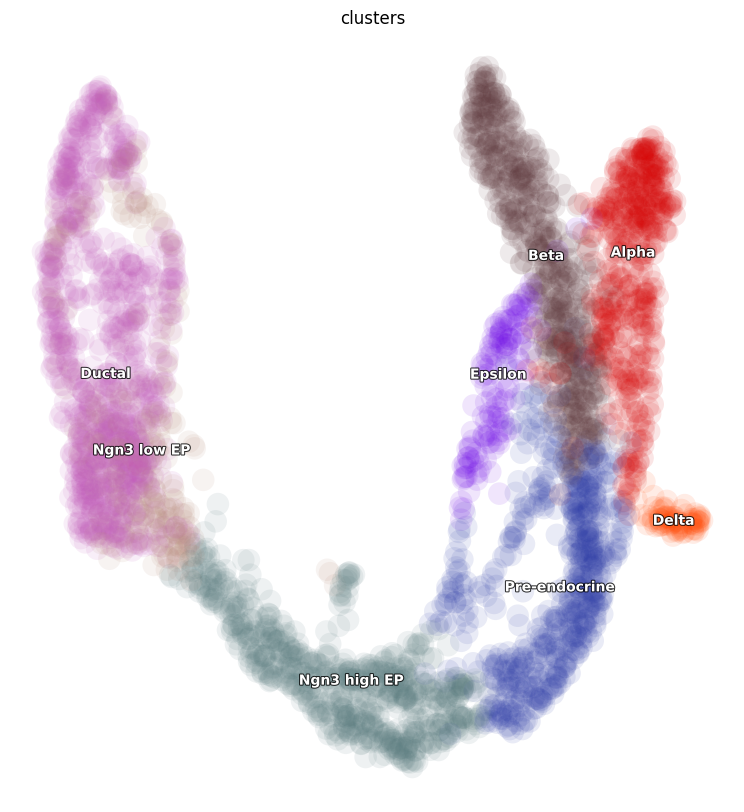

|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [46.2126s]
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [4.9370s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8400s]


<Figure size 640x480 with 0 Axes>

<Figure size 600x400 with 0 Axes>

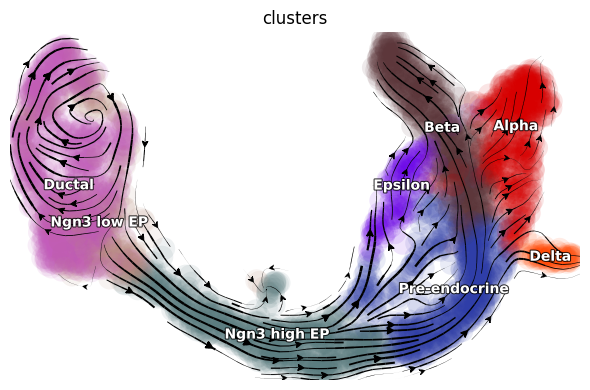

In [4]:

dataset_recipe_time["pancreas"] = preprocessor_benchmark_utils.benchmark_all_recipes(
    dyn.sample_data.pancreatic_endocrinogenesis, "clusters")
dataset_recipe_time["dentategyrus"] = preprocessor_benchmark_utils.benchmark_all_recipes(
    dyn.sample_data.DentateGyrus_scvelo, "clusters")

In [ ]:
rpe1_adata


## RPE1 benchmark

In [ ]:
rpe1_adata

In [ ]:
# color = ['UNG', 'PCNA', 'PLK1', 'HPRT1']
# color = ['PCNA', 'PLK1', 'HPRT1']
color =  ["Condition_Id"]
dataset_recipe_time["rpe1"] = preprocessor_benchmark_utils.benchmark_all_recipes(preprocessor_benchmark_utils.get_clean_rp1_data, color=color, tkey="time")


## Chromaffin Dataset  
http://pklab.med.harvard.edu/velocyto/notebooks/R/chromaffin2.nb.html


In [ ]:
"Chga" in chromaffin_adata.var_names


In [ ]:
color = ["Chga"]
dataset_recipe_time["chromaffin"] = preprocessor_benchmark_utils.benchmark_all_recipes(
    preprocessor_benchmark_utils.get_clean_chromaffin_data, color=color, tkey="time")


## Forebrain Glutamatergic analysis notebook
https://github.com/velocyto-team/velocyto-notebooks/blob/master/python/hgForebrainGlutamatergic.ipynb

In [ ]:
hgForebrainGlutamatergic_adata.var_names

In [ ]:
color = ["SOX2", "EOMES", "SLC17A7"]
dataset_recipe_time["hgForebrainGlutamatergic"] = preprocessor_benchmark_utils.benchmark_all_recipes(preprocessor_benchmark_utils.get_clean_hgForebrainGlutamatergic_data, color=color, tkey="time")


## scEU_seq_organoid  
In dynamo online doc analysis:   
adata = dyn.pp.recipe_monocle(adata, n_top_genes=1000, total_layers=False)

In [ ]:
organoid_adata

In [ ]:
# color = ["cell_type"] # need to update h5ad in sample_data?
color = ["Condition_Id"] # , "RFP_log10_corrected", "GFP_log10_corrected"]
dataset_recipe_time["organoid"] = preprocessor_benchmark_utils.benchmark_all_recipes(
    preprocessor_benchmark_utils.get_clean_organoid_data, recipes=["pearson_residuals"], color=color, tkey="time", dynamics_kwargs={"model": "deterministic", "assumption_mRNA": "ss"})

## BM data
http://pklab.med.harvard.edu/velocyto/notebooks/R/SCG71.nb.html

In [ ]:
bm_adata.var_names

In [ ]:
color = ["Camp"] # , "RFP_log10_corrected", "GFP_log10_corrected"]
dataset_recipe_time["BM"] = preprocessor_benchmark_utils.benchmark_all_recipes(
    dyn.sample_data.BM, color=color, tkey="time")

In [ ]:
dataset_recipe_time

In [ ]:
rpe1_adata.n_obs

In [ ]:
print(bm_adata.n_obs)
print(rpe1_adata.n_obs)
print(organoid_adata.n_obs)
print(pancreas_adata.n_obs)
print(dentate_gyrus_adata.n_obs)
print(hgForebrainGlutamatergic_adata.n_obs)
print(chromaffin_adata.n_obs)